
--- Problem 1: Classification Task with k-NN ---
Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                   

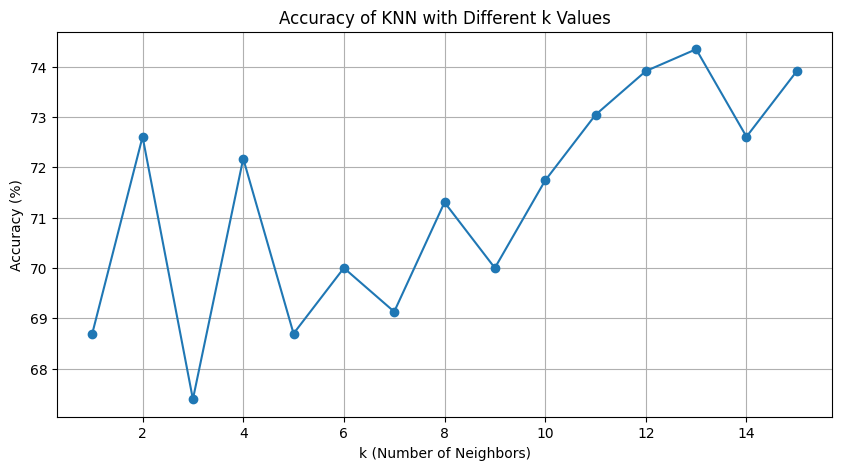


Experimenting with different k values on scaled data:
Accuracy for k=1: 62.17%
Accuracy for k=2: 66.96%
Accuracy for k=3: 70.87%
Accuracy for k=4: 69.13%
Accuracy for k=5: 69.13%
Accuracy for k=6: 68.70%
Accuracy for k=7: 71.74%
Accuracy for k=8: 68.26%
Accuracy for k=9: 70.00%
Accuracy for k=10: 69.13%
Accuracy for k=11: 70.00%
Accuracy for k=12: 71.30%
Accuracy for k=13: 71.30%
Accuracy for k=14: 71.74%
Accuracy for k=15: 72.17%


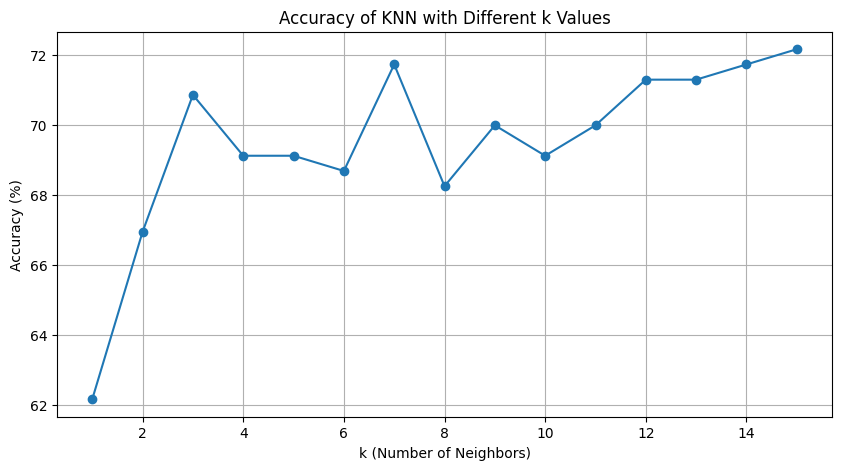

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function Definitions

def load_and_clean_data(file_path):

    data = pd.read_csv("/content/drive/MyDrive/pandas/diabetes.csv")
    print("Initial Dataset Info:")
    print(data.info())
    missing_info = data.isnull().sum()
    print("\nMissing Values:")
    print(missing_info)
    data.fillna(data.mean(), inplace=True)
    return data

def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):

    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

def euclidean_distance(point1, point2):

    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict_single(query, X_train, y_train, k=3):

    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_labels = y_train[sorted_indices[:k]]
    return np.bincount(nearest_labels).argmax()

def knn_predict(X_test, X_train, y_train, k=3):

    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

def compute_accuracy(y_true, y_pred):

    return (np.sum(y_true == y_pred) / len(y_true)) * 100

def scale_features(X):

    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):

    accuracies = {}
    for k in k_values:
        predictions = knn_predict(X_test, X_train, y_train, k)
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
        print(f"Accuracy for k={k}: {accuracy:.2f}%")

    plt.figure(figsize=(10, 5))
    plt.plot(k_values, list(accuracies.values()), marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different k Values')
    plt.grid(True)
    plt.show()

    return accuracies

# Problem 1: Classification Task with k-NN

def problem_1(file_path):
    print("\n--- Problem 1: Classification Task with k-NN ---")
    data = load_and_clean_data(file_path)
    X = data.drop(columns=['Outcome']).values
    y = data['Outcome'].values
    X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)
    predictions = knn_predict(X_test, X_train, y_train, k=3)
    accuracy = compute_accuracy(y_test, predictions)
    print(f"Accuracy without scaling: {accuracy:.2f}%")

# Problem 2: Experimentation with Feature Scaling

def problem_2(file_path):
    print("\n--- Problem 2: Experimentation with Feature Scaling ---")
    data = load_and_clean_data(file_path)
    X = data.drop(columns=['Outcome']).values
    y = data['Outcome'].values
    X_scaled = scale_features(X)
    X_train_scaled, X_test_scaled, y_train, y_test = train_test_split_scratch(X_scaled, y)
    predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)
    accuracy_scaled = compute_accuracy(y_test, predictions_scaled)
    print(f"Accuracy with scaling: {accuracy_scaled:.2f}%")

# Problem 3: Experimentation with Different k Values

def problem_3(file_path):
    print("\n--- Problem 3: Experimentation with Different k Values ---")
    data = load_and_clean_data(file_path)
    X = data.drop(columns=['Outcome']).values
    y = data['Outcome'].values
    X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)
    k_values = range(1, 16)
    print("\nExperimenting with different k values on unscaled data:")
    experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
    X_scaled = scale_features(X)
    X_train_scaled, X_test_scaled, y_train, y_test = train_test_split_scratch(X_scaled, y)
    print("\nExperimenting with different k values on scaled data:")
    experiment_knn_k_values(X_train_scaled, y_train, X_test_scaled, y_test, k_values)

# Main Execution
if __name__ == "__main__":
    dataset_path = "/content/drive/MyDrive/Concept and Technology of AI/diabetes.csv"
    problem_1(dataset_path)
    problem_2(dataset_path)
    problem_3(dataset_path)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
